In [5]:
!pip install tifffile
!pip install napari
from tifffile import imread
import os
import matplotlib.pyplot as plt
import sys
from utils import normalizeFloatZeroOne, save_tiff_imagej_compatible, MaxProjection
import glob
import numpy as np
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError, AttributeError):
        from pathlib2 import Path

try:
        import tempfile
        tempfile.TemporaryDirectory
except (ImportError, AttributeError):
       from backports import tempfile

In [11]:
sourcedir = '/Volumes/TRANSCEND/Claudia/New_Data_LGR5/TifFiles/'
resultsdirLGR = '/Volumes/TRANSCEND/Claudia/New_Data_LGR5/LGRChannelImages/'
resultsdirTRL = '/Volumes/TRANSCEND/Claudia/New_Data_LGR5/TRLChannelImages/'
resultsdirRED = '/Volumes/TRANSCEND/Claudia/New_Data_LGR5/REDChannelImages/'
Path(resultsdirLGR).mkdir(exist_ok = True)
Path(resultsdirTRL).mkdir(exist_ok = True)
Path(resultsdirRED).mkdir(exist_ok = True)
Raw_path = os.path.join(sourcedir, '*tif')
X = glob.glob(Raw_path)
axes = 'YX'

In [12]:

#For Max Projection
ZAxis = 0
#Total Number of chqnnels
Channels = 3
for fname in X:
    image = imread(fname)
    
    MaxProjectedImage = MaxProjection(image, axis = ZAxis)
    for i in range(0,Channels):
      ChannelImage = MaxProjectedImage[i, :]
      NormalizedTransmittedImage = normalizeFloatZeroOne(ChannelImage)  
      if i == 0:
              save_tiff_imagej_compatible((resultsdirLGR + os.path.basename(fname) ) ,  NormalizedTransmittedImage, axes)

      if i == 1:
              save_tiff_imagej_compatible((resultsdirTRL + os.path.basename(fname)  ) ,  NormalizedTransmittedImage, axes)

      if i == 2:
              save_tiff_imagej_compatible((resultsdirRED + os.path.basename(fname)  ) ,  NormalizedTransmittedImage, axes)

      


  

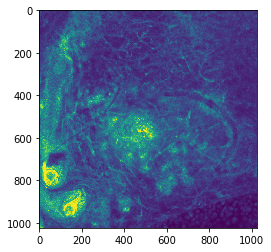

In [13]:
plt.imshow(NormalizedTransmittedImage)